In [1]:
import numpy as np
import scipy as sp
import scipy.stats as st
import sys,json,os
sys.path.append('../..')
import matplotlib.pyplot as plt
import Project.profiles as pp
import Project.new_profiles as pnp
import Project.plot_assist as pa
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['mathtext.fontset'] = 'dejavuserif'
from Project.constants import Constants as pc

In [2]:
sparcd = json.load(open('../../obs_RC_v4/Output/result_dicts/sparc_fit_dict.json','r'))
bry_2 = json.load(open('../../sim_RC_12/Output/resdicts/Bry_2sig_dict.json','r'))
bry_1 = json.load(open('../../sim_RC_12/Output/resdicts/Bry_1sig_dict.json','r'))
bry_p5 = json.load(open('../../sim_RC_12/Output/resdicts/Bry_p5sig_dict.json','r'))

In [3]:
ugc = np.loadtxt('../../Accessory/RotCurvs/UGC05750_rotmod.dat')
ic = np.loadtxt('../../Accessory/RotCurvs/IC2574_rotmod.dat')

29.264607540546
[17.10139302770141, 4.9700508451040735]
12.03093823967589
[8.925402433120526, 3.0372324389796734]


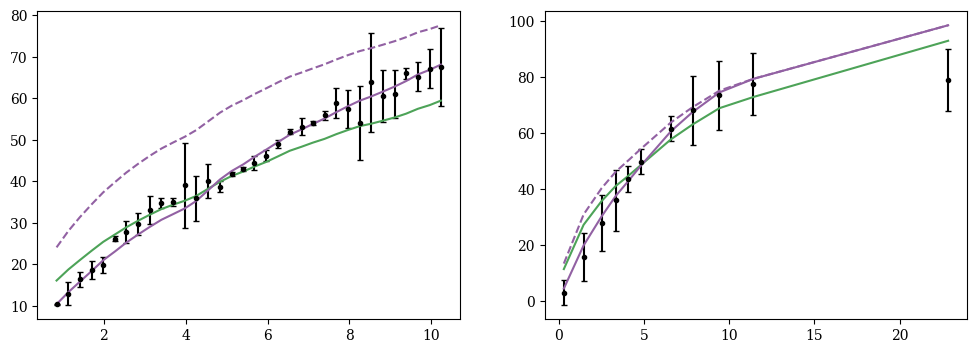

In [8]:
icgals = ['IC2574','UGC05750']
fig,axs = plt.subplots(1,2,figsize = (12,4))
prior = 'flat'
for i in range(2):
    ax = axs[i]
    gal = icgals[i]
    r = sparcd[prior][gal]['r']
    vc = sparcd[prior][gal]['vc']
    ve = sparcd[prior][gal]['ve']
    vmn = sparcd[prior][gal]['cusp_fit']['vcmodel']
    vmc = sparcd[prior][gal]['core_fit']['vcmodel']
    vmcn = sparcd[prior][gal]['core_fit']['vnfw_core']
    rc = sparcd[prior][gal]['core_fit']['r1'][0]
    ax.errorbar(r,vc,ve,fmt = '.',c = 'k',capsize = 2)
    ax.plot(r,vmn, c = pa.green)
    ax.plot(r,vmc, c = pa.purple)
    # ax.plot([rc,rc],ax.get_ylim(),c = pa.purple, ls = '--')
    ax.plot(r,vmcn, c = pa.purple, ls = '--')
    print (rc)
    print (sparcd[prior][gal]['core_fit']['rb'])

In [7]:
icgals = ['IC2574','UGC05750']
prior = 'lcdm'
simgals = {'%s'%icgal:[] for icgal in icgals}
for i in range(2):
    icgal = icgals[i]
    r = sparcd[prior][icgal]['r']
    vc = sparcd[prior][icgal]['vc']
    ve = sparcd[prior][icgal]['ve']
    rlast = r[-1]
    vlast = vc[-1]
    elast = ve[-1]
    for gal in bry_2:
        if 'S' in gal:
            data = np.loadtxt('../../sim_RC_12/Output/Mock_gals/Bry_2sig_gals/%s.dat'%gal)
            r,v = data[:,0],data[:,1]
            if np.abs(vlast - v[-1]) <= elast:
                if np.abs(rlast - r[-1]) <= elast:
                    simgals[icgal].append(gal)
                    

In [9]:
simrds = {icgals[i]:[] for i in range(2)}
simrgs = {icgals[i]:[] for i in range(2)}
for i in range(2):
    icgal = icgals[i]
    for gal in simgals[icgal]:
        simrds[icgal].append(bry_2[gal]['core_fit']['rdstar'])
        simrgs[icgal].append(bry_2[gal]['core_fit']['rdgas'])

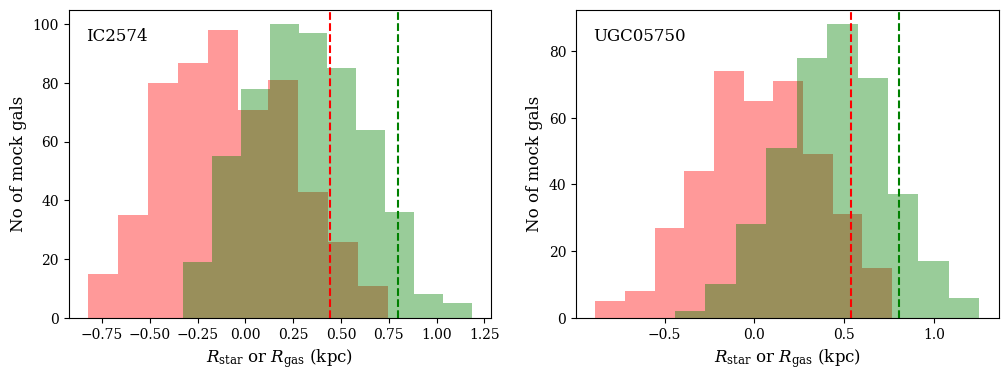

In [10]:
fig,axs = plt.subplots(1,2,figsize = (12,4))
for i in range(2):
    icgal = icgals[i]
    rd = np.array(simrds[icgal])
    rg = np.array(simrgs[icgal])
    ax = axs[i]
    ax.hist(np.log10(rd),alpha = 0.4, color = 'r')
    ax.hist(np.log10(rg),alpha = 0.4, color = 'g')
    rdic = np.log10(sparcd[prior][icgal]['core_fit']['rdstar'][0])
    rgic = np.log10(sparcd[prior][icgal]['core_fit']['rdgas'][0])
    ylim = ax.get_ylim()
    ax.plot([rdic,rdic],ylim, c = 'r', ls = '--',label = 'observed $R_{\mathrm{star}}$')
    ax.plot([rgic,rgic],ylim, c = 'g', ls = '--',label = 'observed $R_{\mathrm{gas}}$')
    ax.set_ylim(ylim)
    ax.set_xlabel('$R_{\mathrm{star}}\,\, \mathrm{or} \,\, R_{\mathrm{gas}}$ (kpc)',size = 12)
    ax.set_ylabel('No of mock gals',size = 12)
    ax.text(0.04,0.9, icgal, size = 12, transform = ax.transAxes)

In [11]:
simlms = {icgals[i]:[] for i in range(2)}
simlmg = {icgals[i]:[] for i in range(2)}
for i in range(2):
    icgal = icgals[i]
    for gal in simgals[icgal]:
        simlms[icgal].append(bry_2[gal]['core_fit']['lmstar'])
        simlmg[icgal].append(bry_2[gal]['core_fit']['lmgas'])

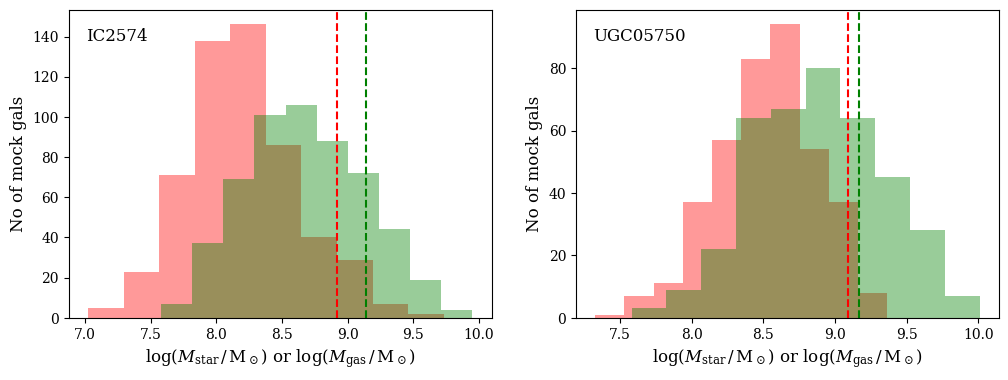

In [12]:
fig,axs = plt.subplots(1,2,figsize = (12,4))
for i in range(2):
    icgal = icgals[i]
    lms = np.array(simlms[icgal])
    lmg = np.array(simlmg[icgal])
    ax = axs[i]
    ax.hist(lms,alpha = 0.4, color = 'r')
    ax.hist(lmg,alpha = 0.4, color = 'g')
    lmsic = sparcd[prior][icgal]['core_fit']['lmstar'][0]
    lmgic = sparcd[prior][icgal]['core_fit']['lmgas'][0]
    ylim = ax.get_ylim()
    ax.plot([lmsic,lmsic],ylim, c = 'r', ls = '--',label = 'observed $R_{\mathrm{star}}$')
    ax.plot([lmgic,lmgic],ylim, c = 'g', ls = '--',label = 'observed $R_{\mathrm{gas}}$')
    ax.set_ylim(ylim)
    ax.set_xlabel('$\mathrm{log}(M_{\mathrm{star}}\,/\,\mathrm{M_\odot}) \,\, \mathrm{or} \,\, \mathrm{log}(M_{\mathrm{gas}}\,/\,\mathrm{M_\odot})$',size = 12)
    ax.set_ylabel('No of mock gals',size = 12)
    ax.text(0.04,0.9, icgal, size = 12, transform = ax.transAxes)

In [13]:
simlm = {icgals[i]:[] for i in range(2)}
for i in range(2):
    icgal = icgals[i]
    for gal in simgals[icgal]:
        simlm[icgal].append(bry_2[gal]['original']['lm'])

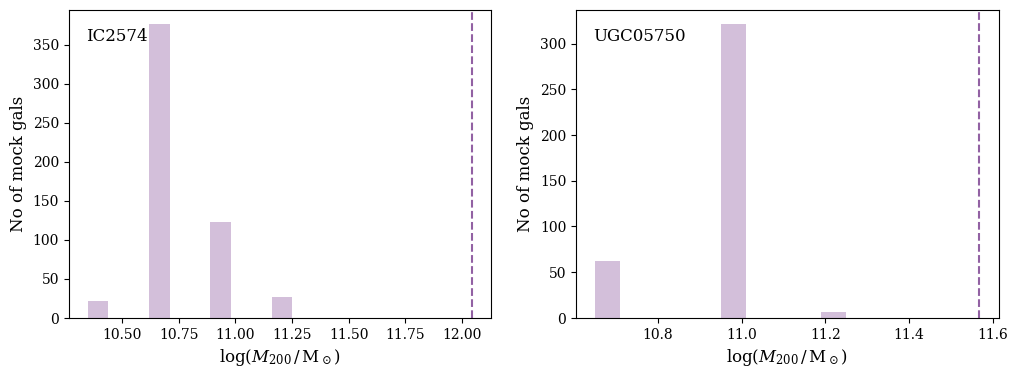

In [14]:
fig,axs = plt.subplots(1,2,figsize = (12,4))
for i in range(2):
    icgal = icgals[i]
    lm = np.array(simlm[icgal])
    ax = axs[i]
    ax.hist(lm,alpha = 0.4, color = pa.purple)
    lmic = sparcd[prior][icgal]['core_fit']['lm'][0]
    ylim = ax.get_ylim()
    ax.plot([lmic,lmic],ylim, c = pa.purple, ls = '--')
    ax.set_ylim(ylim)
    ax.set_xlabel('$\mathrm{log}(M_{\mathrm{200}}\,/\,\mathrm{M_\odot})$',size = 12)
    ax.set_ylabel('No of mock gals',size = 12)
    ax.text(0.04,0.9, icgal, size = 12, transform = ax.transAxes)

In [28]:
simrc = {icgals[i]:[] for i in range(2)}
for i in range(2):
    icgal = icgals[i]
    for gal in simgals[icgal]:
        simrc[icgal].append(bry_2[gal]['original']['r1'])

IC2574 4.253643510054845 1.990791879505134
UGC05750 4.743298714652957 2.1276530411875054


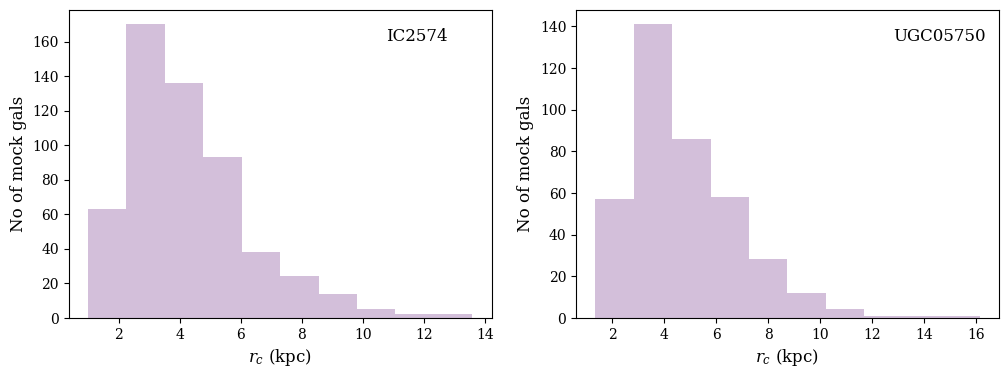

In [38]:
fig,axs = plt.subplots(1,2,figsize = (12,4))
for i in range(2):
    icgal = icgals[i]
    rc = np.array(simrc[icgal])
    ax = axs[i]
    print (icgal, np.mean(rc), np.std(rc))
    ax.hist(rc,alpha = 0.4, color = pa.purple)
    rcic = sparcd[prior][icgal]['core_fit']['r1'][0]
    ylim = ax.get_ylim()
    # ax.plot([rcic,rcic],ylim, c = pa.purple, ls = '--')
    ax.set_ylim(ylim)
    ax.set_xlabel('$r_c$ (kpc)',size = 12)
    ax.set_ylabel('No of mock gals',size = 12)
    ax.text(0.75,0.9, icgal, size = 12, transform = ax.transAxes)
plt.savefig('../Output/plots_for_report/IC2574_UGC05750_mock_core_radius.pdf',bbox_inches = 'tight',dpi = 300)

In [4]:
r_add = [12.2,13.6,15,16.3,17.7,19.0,20.4]
vc_add = [71.2,73.0,73.5,74.5,74.9,75.47,75.47]
ve_add = np.array([5.1,5.0,5.0,5.0,4.8,4.9,4.9])*2
vg_add = [25.6,26.7,27.6,29.0,29.6,31.0,33.1]
vs_add = np.array([13.8,12.4,11.5,11.0,10.7,10.1,10.1])/np.sqrt(0.14)

In [5]:
r,vc,ve,vg,vs = ugc[:,0],ugc[:,1],ugc[:,2],ugc[:,3],ugc[:,4]
ugc_r = list(r[:-1])
ugc_vc = list(vc[:-1])
ugc_ve = list(ve[:-1])
ugc_vg = list(vg[:-1])
ugc_vs = list(vs[:-1])
for i in range(len(r_add)):
    ugc_r.append(r_add[i])
    ugc_vc.append(vc_add[i])
    ugc_ve.append(ve_add[i])
    ugc_vg.append(vg_add[i])
    ugc_vs.append(vs_add[i])
ugc_r.append(r[-1])
ugc_vc.append(vc[-1])
ugc_ve.append(ve[-1])
ugc_vg.append(vg[-1])
ugc_vs.append(vs[-1])

ugc_r = np.array(ugc_r)
ugc_vc = np.array(ugc_vc)
ugc_ve = np.array(ugc_ve)
ugc_vg = np.array(ugc_vg)
ugc_vs = np.array(ugc_vs)

In [6]:
prior = 'lcdm'
gal = 'UGC05750'
vexp_fn = lambda r,lmstar,rdstar: pp.v_exp(lmstar,rdstar,r)
popt, pcov = sp.optimize.curve_fit(vexp_fn, ugc_r, ugc_vs)
ugc_lmstar,ugc_rdstar = popt
print (ugc_lmstar, sparcd[prior][gal]['lmdisk_1'][0])
print (ugc_rdstar, sparcd[prior][gal]['rdstar_1'][0])

popt, pcov = sp.optimize.curve_fit(vexp_fn, ugc_r, ugc_vg)
ugc_lmgas,ugc_rdgas = popt
print (ugc_lmgas, sparcd[prior][gal]['lmgas_1'][0])
print (ugc_rdgas, sparcd[prior][gal]['rdgas_1'][0])


popt, pcov = sp.optimize.curve_fit(vexp_fn, r, vg)
ugc_lmgas2,ugc_rdgas2 = popt
print (ugc_lmgas2, sparcd[prior][gal]['lmgas_1'][0])
print (ugc_rdgas2, sparcd[prior][gal]['rdgas_1'][0])

9.51236022172641 9.414747375533931
4.381448204931233 3.46
10.55832656289849 9.164849333390576
28.63378713736043 6.379393987689289
10.741385259037532 9.164849333390576
33.81510576885548 6.379393987689289


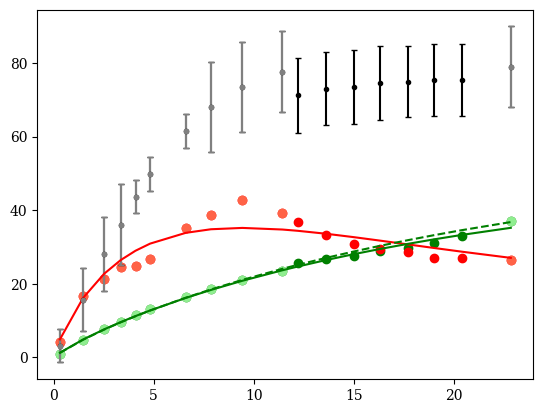

In [7]:
plt.errorbar(ugc_r,ugc_vc,ugc_ve,fmt = '.',c = 'k',capsize = 2)
plt.scatter(ugc_r,ugc_vg,c = 'g')
plt.scatter(ugc_r,ugc_vs,c = 'r')
plt.errorbar(r,vc,ve, fmt = '.',c = 'grey',capsize = 2)
plt.scatter(r,vg, c = 'lightgreen')
plt.scatter(r,vs, c = 'tomato')
plt.plot(ugc_r, pp.v_exp(ugc_lmstar,ugc_rdstar,ugc_r), c = 'r')
plt.plot(ugc_r, pp.v_exp(ugc_lmgas, ugc_rdgas, ugc_r), c = 'g')
plt.plot(ugc_r, pp.v_exp(ugc_lmgas2, ugc_rdgas2, ugc_r), c = 'g',ls = '--')

In [7]:
r_add = [10.522099447513812, 10.7292817679558, 10.950276243093922, 11.171270718232044, 11.406077348066297, 11.62707182320442, 11.861878453038674, 12.11049723756906, 12.345303867403315, 12.566298342541437, 12.80110497237569]
vc_add = [78.02816901408451, 74.92957746478874, 76.19718309859155, 79.85915492957747, 76.05633802816902, 75.91549295774648, 75.07042253521126, 73.80281690140845, 78.16901408450704, 78.02816901408451, 78.73239436619718]
vep_add = [83.38028169014085, 80, 80.84507042253522, 83.94366197183099, 80, 80, 78.59154929577466, 77.1830985915493, 82.11267605633803, 82.95774647887325, 81.69014084507043]
vem_add = [72.53521126760563, 70, 71.69014084507043, 75.63380281690141, 71.97183098591549, 71.97183098591549, 71.40845070422534, 70, 74.22535211267606, 73.66197183098592, 75.77464788732394]
vg_add = [32.3943661971831, 31.408450704225352, 31.12676056338028, 30.422535211267608, 30, 29.43661971830986, 29.15492957746479, 28.309859154929576, 28.028169014084508, 27.323943661971832, 26.338028169014084]
vs_add = [11.267605633802816, 11.126760563380282, 10.985915492957746, 10.84507042253521, 11.267605633802816, 11.408450704225352, 11.549295774647886, 11.830985915492958, 11.971830985915492, 11.971830985915492, 11.971830985915492]
ve_add = list((np.array(vep_add) - np.array(vem_add))*0.5)
vs_add = list(np.array(vs_add)/np.sqrt(0.25))
vg_add = list(np.array(vg_add)-5)

In [8]:
kam_r = [0.2458563535911602, 0.4530386740331491, 0.6878453038674033, 0.9502762430939227, 1.1712707182320443, 1.4060773480662982, 1.6408839779005526, 1.861878453038674, 2.0828729281767955, 2.345303867403315, 2.5662983425414363, 2.8011049723756907, 3.022099447513812, 3.2569060773480665, 3.4917127071823204, 3.7265193370165743, 3.947513812154696, 4.196132596685082, 4.430939226519337, 4.651933701657459, 4.886740331491712, 5.107734806629834, 5.342541436464089, 5.577348066298343, 5.8259668508287294, 6.074585635359115, 6.295580110497237, 6.502762430939226, 6.751381215469613, 6.986187845303867, 7.207182320441989, 7.469613259668508, 7.676795580110497, 7.925414364640884, 8.146408839779006, 8.38121546961326, 8.602209944751381, 8.823204419889503, 9.085635359116022, 9.306629834254142, 9.541436464088397, 9.762430939226519, 9.997237569060772, 10.232044198895027, 10.494475138121546, 10.7292817679558, 10.950276243093922, 11.157458563535911, 11.406077348066297, 11.62707182320442, 11.861878453038674, 12.124309392265193, 12.359116022099448, 12.580110497237568, 12.80110497237569]
kam_vc = [3.4823529411764724, 8.988235294117647, 11.811764705882354, 15.623529411764707, 18.729411764705883, 20.141176470588235, 23.24705882352941, 23.811764705882354, 24.8, 27.482352941176472, 29.317647058823532, 33.55294117647059, 33.55294117647059, 34.82352941176471, 37.2235294117647, 38.07058823529412, 41.45882352941176, 42.72941176470589, 43.576470588235296, 44.98823529411764, 46.82352941176471, 49.64705882352941, 51.48235294117647, 53.035294117647055, 53.741176470588236, 55.294117647058826, 57.12941176470588, 58.8235294117647, 61.22352941176471, 64.32941176470588, 66.72941176470587, 68.28235294117647, 67.71764705882353, 68.98823529411764, 69.69411764705882, 71.38823529411765, 71.95294117647059, 72.23529411764706, 72.8, 73.78823529411764, 73.78823529411764, 75.19999999999999, 76.47058823529412, 76.89411764705882, 78.30588235294118, 75.05882352941177, 76.47058823529412, 80.14117647058823, 76.04705882352941, 75.90588235294118, 75.05882352941177, 73.78823529411764, 78.30588235294118, 78.30588235294118, 78.72941176470587]
kam_up = [4.752941176470589, 12.941176470588236, 16.04705882352941, 21.129411764705882, 24.094117647058823, 26.776470588235295, 29.458823529411767, 28.61176470588235, 29.6, 31.71764705882353, 33.12941176470588, 38.07058823529412, 37.78823529411765, 38.635294117647064, 41.317647058823525, 42.023529411764706, 45.27058823529411, 47.10588235294118, 47.247058823529414, 49.08235294117647, 51.76470588235294, 55.01176470588235, 57.27058823529412, 56.98823529411764, 57.12941176470588, 59.10588235294117, 60.94117647058823, 62.917647058823526, 65.45882352941177, 68.14117647058823, 71.10588235294117, 72.23529411764706, 71.67058823529412, 73.2235294117647, 72.8, 75.48235294117647, 76.75294117647059, 77.17647058823529, 77.6, 78.4470588235294, 78.4470588235294, 80.28235294117647, 80.98823529411764, 81.41176470588235, 83.52941176470588, 80, 80.84705882352941, 84.37647058823529, 80.28235294117647, 80.14117647058823, 78.87058823529412, 77.31764705882352, 82.4, 83.10588235294117, 81.83529411764707]
kam_lw = [1.7882352941176478, 4.470588235294118, 7.576470588235294, 10.4, 12.941176470588236, 13.364705882352942, 17.03529411764706, 18.870588235294118, 20.141176470588235, 23.24705882352941, 25.50588235294118, 28.61176470588235, 29.03529411764706, 31.011764705882353, 33.411764705882355, 33.83529411764706, 36.65882352941176, 38.635294117647064, 40.04705882352941, 40.470588235294116, 42.16470588235294, 44.84705882352941, 46.4, 48.94117647058823, 50.21176470588235, 51.62352941176471, 53.45882352941177, 54.870588235294115, 57.411764705882355, 60.65882352941176, 62.63529411764706, 64.04705882352941, 63.62352941176471, 65.03529411764706, 66.16470588235293, 67.5764705882353, 67.15294117647059, 67.29411764705883, 68, 68.70588235294117, 69.12941176470588, 69.69411764705882, 71.52941176470588, 72.37647058823529, 72.65882352941176, 70.4, 71.67058823529412, 75.62352941176471, 71.81176470588235, 71.81176470588235, 71.38823529411765, 70.25882352941176, 74.49411764705883, 73.64705882352942, 75.90588235294118]
kam_ve = 0.5*(np.array(kam_up)-np.array(kam_lw))
kam_r = np.array(kam_r)
kam_vc = np.array(kam_vc)

In [9]:
r,vc,ve,vg,vs = ic[:,0],ic[:,1],ic[:,2],ic[:,3],ic[:,4]
ic_r = list(r)
ic_vc = list(vc)
ic_ve = list(ve)
ic_vg = list(vg)
ic_vs = list(vs)
for i in range(len(r_add)):
    ic_r.append(r_add[i])
    ic_vc.append(vc_add[i])
    ic_ve.append(ve_add[i])
    ic_vg.append(vg_add[i])
    ic_vs.append(vs_add[i])
ic_r = np.array(ic_r)
ic_vc = np.array(ic_vc)
ic_ve = np.array(ic_ve)
ic_vg = np.array(ic_vg)
ic_vs = np.array(ic_vs)

In [712]:
prior = 'lcdm'
gal = 'IC2574'
vexp_fn = lambda r,lmstar,rdstar: pp.v_exp(lmstar,rdstar,r)
popt, pcov = sp.optimize.curve_fit(vexp_fn, ic_r, ic_vs)
ic_lmstar,ic_rdstar = popt
print (np.around(ic_lmstar,3), np.around(sparcd[prior][gal]['lmdisk_1'][0],3))
print (np.around(ic_rdstar,3), np.around(sparcd[prior][gal]['rdstar_1'][0],3))

ic_lmgas2 = 9.13
vexp_g = lambda r,rdgas2: pp.v_exp(ic_lmgas2,rdgas2,r)
popt, pcov = sp.optimize.curve_fit(vexp_g, ic_r, ic_vg)
ic_rdgas2 = popt[0]
print (np.around(ic_lmgas2,3), np.around(sparcd[prior][gal]['lmgas_1'][0],3))
print (np.around(ic_rdgas2,3), np.around(sparcd[prior][gal]['rdgas_1'][0],3))

popt, pcov = sp.optimize.curve_fit(vexp_fn, ic_r, ic_vg)
ic_lmgas,ic_rdgas = popt
print (np.around(ic_lmgas,3), np.around(sparcd[prior][gal]['lmgas_1'][0],3))
print (np.around(ic_rdgas,3), np.around(sparcd[prior][gal]['rdgas_1'][0],3))

9.123 9.015
3.415 2.78
9.13 9.139
5.684 6.24
11.278 9.139
53.982 6.24


NameError: name 'ic_lmstar' is not defined

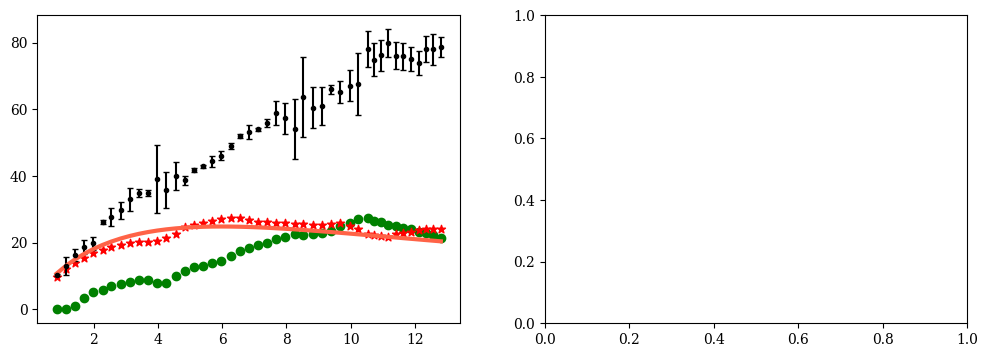

In [10]:
fig,axs = plt.subplots(1,2,figsize = (12,4))
ax1,ax2 = axs
ax1.errorbar(ic_r,ic_vc,ic_ve,fmt ='.',c = 'k',capsize = 2)
ax1.scatter(ic_r,ic_vg, c = 'g')
ax1.scatter(ic_r,ic_vs, c = 'r', marker = '*')
ic_gald = sparcd['lcdm_vmax']['IC2574']['core_fit']
ax1.plot(ic_r,pp.v_exp(ic_gald['lmstar'][0]-np.log10(ic_gald['yd'][0]),ic_gald['rdstar'][0],ic_r), c = 'tomato', lw = 3, ls = '-')
ax1.plot(ic_r,pp.v_exp(ic_lmstar,ic_rdstar,ic_r),c = 'tomato', ls = '--',lw = 3)
ax1.plot(ic_r,pp.v_exp(ic_gald['lmgas'][0],ic_gald['rdgas'][0],ic_r), c = 'lightgreen', lw = 3, ls = '-')
ax1.plot(ic_r,pp.v_exp(ic_lmgas,ic_rdgas,ic_r), c = 'lightgreen', ls = '--',lw = 3)

ax2.errorbar(ugc_r,ugc_vc,ugc_ve,fmt ='.',c = 'k',capsize = 2)
ax2.scatter(ugc_r,ugc_vg, c = 'g')
ax2.scatter(ugc_r,ugc_vs, c = 'r', marker = '*')
ugc_gald = sparcd['lcdm']['UGC05750']['core_fit']
ax2.plot(ugc_r,pp.v_exp(ugc_gald['lmstar'][0]-np.log10(ugc_gald['yd'][0]),ugc_gald['rdstar'][0],ugc_r), c = 'tomato', lw = 3, ls = '-')
ax2.plot(ugc_r,pp.v_exp(ugc_lmstar,ugc_rdstar,ugc_r),c = 'tomato', ls = '--',lw = 3)
ax2.plot(ugc_r,pp.v_exp(ugc_gald['lmgas'][0],ugc_gald['rdgas'][0],ugc_r), c = 'lightgreen', lw = 3, ls = '-')
ax2.plot(ugc_r,pp.v_exp(ugc_lmgas,ugc_rdgas,ugc_r), c = 'lightgreen', ls = '--',lw = 3)


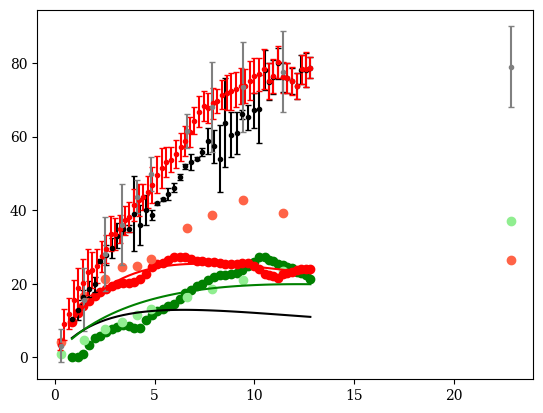

In [597]:
plt.errorbar(ic_r,ic_vc,ic_ve, fmt = '.',c = 'k',capsize = 2)
plt.errorbar(kam_r,kam_vc,kam_ve, fmt = '.', c = 'r',capsize = 2)
plt.errorbar(r,vc,ve, fmt = '.',c = 'grey',capsize = 2)
plt.scatter(ic_r,ic_vg, c = 'g')
plt.scatter(r,vg, c = 'lightgreen')
plt.scatter(ic_r,ic_vs, c = 'r')
plt.scatter(r,vs, c = 'tomato')
plt.plot(ic_r,pp.v_exp(np.log10(3*1e8),3.,ic_r),c = 'k')
plt.plot(ic_r,pp.v_exp(ic_lmstar,ic_rdstar,ic_r), c = 'r')
plt.plot(ic_r,pp.v_exp(ic_lmgas,ic_rdgas,ic_r), c = 'g')

In [151]:
import ultranest
import ultranest.stepsampler as stepsamp
import scipy.stats as st

In [323]:
param_names = ['lm','c2','rc','yd']
galname = 'IC2574'
def priors_lcdm(cube):
    params = cube.copy()
    params[0] = cube[0]*(14.-7.) + 7.
    lc200 = pp.lc200_SR(params[0])
    params[1] = 10**sp.stats.norm.ppf(cube[1],lc200,0.11)
    r1hi = pnp.rs_nfw(params[0],params[1])
    params[2] = cube[2]*(r1hi-0.1) + 0.1
    params[3] = 10**sp.stats.norm.ppf(cube[3],np.log10(0.5),0.1)
    return params
def priors_flat(cube):
    params = cube.copy()
    params[0] = cube[0]*(14. - 7.) + 7.
    params[1] = cube[1]*(100. - 1.) + 1.
    r1hi = pnp.rs_nfw(params[0],params[1])
    params[2] = cube[2]*(r1hi - 0.1) + 0.1
    params[3] = 10**sp.stats.norm.ppf(cube[3], np.log10(0.5),0.1)
    return params
def ll_lcdm(params):
    lm,c2,rc,yd = params
    if yd <= 0:
        return -1e38
    rs = pnp.rs_nfw(lm,c2)
    if rc > rs:
        return -1e38
    mbary = 10**ic_lmgas + yd*(10**ic_lmstar)
    if mbary/10**lm > 0.2:
        return -1e38
    vsidm = pp.v_sidm(lm,rs,rc,ic_r)
    vcmodel_sq = vsidm**2 + ic_vg*np.abs(ic_vg) + yd*ic_vs**2
    vcmodel = np.sqrt(vcmodel_sq)
    llike = -0.5*(((ic_vc-vcmodel)/ic_ve)**2).sum()
    return llike
ultraroot = '../../Old/Output/Ultra/'
nsteps = 2*len(param_names)
sampler_ic = ultranest.ReactiveNestedSampler(param_names,ll_lcdm,priors_flat,log_dir=ultraroot,
                                         resume='overwrite')
sampler_ic.stepsampler = stepsamp.RegionSliceSampler(nsteps=nsteps)
sampler_ic.run()
sampler_ic.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-4e+01   [-39.3669..-39.3668]*| it/evals=3859/116841 eff=3.1458% N=204        4 4  4 4   
[ultranest] Likelihood function evaluations: 116893
[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -53.38 +- 0.2383
[ultranest] Effective samples strategy satisfied (ESS = 1056.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.13 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.24, need <0.5)
[ultranest]   logZ error budget: single: 0.25 bs:0.24 tail:0.01 total:0.24 required:<0.50
[ultranest] done iterating.

logZ = -53.376 +- 0.323
  single instance: logZ = -53.376 +- 0.175
  bootstrapped   : logZ = -53.377 +- 0.323
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    lm                  : 11.36 │ ▁ ▁▁▁▂▄▃▄▆▆▇▆▅▅▅▅▄▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁ ▁▁ │13.71     12.32 +- 0.38
    c2 

In [327]:
lm_k = np.log10(1.5*1e11)
lm_k = np.log10(9*1e10)
c2_k = 10**(pp.lc200_SR(lm_k) - 1.5*0.11)
rc_k = 8.
yd_k = 0.25
rs_k = pnp.rs_nfw(lm_k,c2_k)
print (lm_k,c2_k,rc_k)

10.954242509439325 7.11741440068511 8.0


[12.322236425457273, 2.879052445631592, 89.96961413030809, 52.724112970871126, 0.8411817324093372]


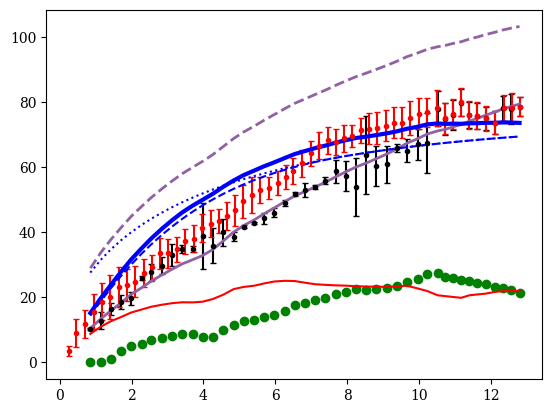

In [392]:
lm,c2,rc,yd = sampler_ic.results['posterior']['mean']
rs = pnp.rs_nfw(lm,c2)
ic_params = [lm,c2,rs,rc,yd]
print (ic_params)
plt.errorbar(ic_r,ic_vc,ic_ve,fmt = '.', c= 'k',capsize = 2)
plt.errorbar(kam_r,kam_vc,kam_ve, fmt = '.', c = 'r',capsize = 2)
ic_vcmodel = np.sqrt(pp.v_sidm(lm,rs,rc,ic_r)**2 + ic_vg*np.abs(ic_vg) + yd*ic_vs**2)
ic_vcnfwmodel = np.sqrt(pp.v_nfw(lm,rs,ic_r)**2 + ic_vg*np.abs(ic_vg) + yd*ic_vs**2)
plt.plot(ic_r, ic_vcmodel, c = pa.purple, ls = '-', lw = 2)
plt.plot(ic_r, ic_vcnfwmodel, c = pa.purple, ls = '--', lw = 2)
plt.plot(ic_r, ic_vs*np.sqrt(yd), c = 'red', ls = '-')
plt.scatter(ic_r, ic_vg, c = 'g')
ic_vcmodelk = np.sqrt(pp.v_sidm(lm_k,rs_k,rc_k,ic_r)**2 + ic_vg*(np.abs(ic_vg)) + yd_k*ic_vs**2)
plt.plot(ic_r, ic_vcmodelk, c = 'b',lw = 3)
plt.plot(ic_r, pp.v_sidm(lm_k,rs_k,rc_k,ic_r), c='b', ls = '--')
plt.plot(ic_r, pp.v_nfw(lm_k,rs_k,ic_r), c= 'b', ls = ':')

In [325]:
param_names = ['lm','c2','rc','yd']
galname = 'UGC05750'
def prior(cube):
    params = cube.copy()
    params[0] = cube[0]*(14.-7.) + 7.
    lc200 = pp.lc200_SR(params[0])
    params[1] = 10**st.norm.ppf(cube[1],lc200,0.11)
    r1hi = pnp.rs_nfw(params[0],params[1])
    params[2] = cube[2]*(r1hi-0.1) + 0.1
    params[3] = 10**st.norm.ppf(cube[3],np.log10(0.5),0.1)
    return params
def ll_lcdm(params):
    lm,c2,rc,yd = params
    if yd <= 0:
        return -1e38
    rs = pnp.rs_nfw(lm,c2)
    # if rc > rs:
    #     return -1e38
    mbary = 10**ugc_lmgas + yd*(10**ugc_lmstar)
    # if mbary/10**lm > 0.2:
    #     return -1e38
    vsidm = pp.v_sidm(lm,rs,rc,ugc_r)
    vcmodel_sq = vsidm**2 + ugc_vg*np.abs(ugc_vg) + yd*ugc_vs**2
    vcmodel = np.sqrt(vcmodel_sq)
    llike = -0.5*(((ugc_vc-vcmodel)/ugc_ve)**2).sum()
    return llike
ultraroot = '../../Old/Output/Ultra/'
nsteps = 2*len(param_names)
sampler_ugc = ultranest.ReactiveNestedSampler(param_names,ll_lcdm,prior,log_dir=ultraroot,
                                         resume='overwrite')
sampler_ugc.stepsampler = stepsamp.RegionSliceSampler(nsteps=nsteps)
sampler_ugc.run()
sampler_ugc.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-0.8  [-0.8356..-0.8355]*| it/evals=4928/94441 eff=5.2403% N=400      0 
[ultranest] Likelihood function evaluations: 94466
[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -8.548 +- 0.1024
[ultranest] Effective samples strategy satisfied (ESS = 1883.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.10, need <0.5)
[ultranest]   logZ error budget: single: 0.13 bs:0.10 tail:0.01 total:0.10 required:<0.50
[ultranest] done iterating.

logZ = -8.537 +- 0.212
  single instance: logZ = -8.537 +- 0.126
  bootstrapped   : logZ = -8.548 +- 0.212
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    lm                  : 10.37 │ ▁  ▁▁▁▁▁▁▁▂▂▃▃▅▆▆▆▇▇▇▇▆▅▅▄▃▃▂▁▁▁▁▁▁▁▁ │11.33     10.88 +- 0.12
    c2                  : 3.

[10.878964020859396, 6.2993262377274615, 13.581900100197052, 10.836235789653099, 0.4945640406498004]


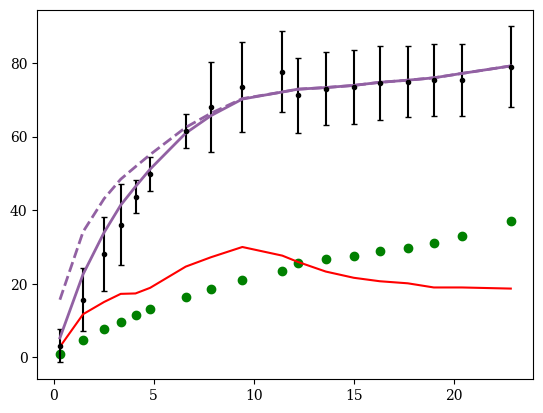

In [326]:
lm,c2,rc,yd = sampler_ugc.results['posterior']['mean']
rs = pnp.rs_nfw(lm,c2)
ugc_params = [lm,c2,rs,rc,yd]
print (ugc_params)
plt.errorbar(ugc_r,ugc_vc,ugc_ve,fmt = '.', c= 'k',capsize = 2)
ugc_vcmodel = np.sqrt(pp.v_sidm(lm,rs,rc,ugc_r)**2 + ugc_vg*np.abs(ugc_vg) + yd*ugc_vs**2)
ugc_vcnfwmodel = np.sqrt(pp.v_nfw(lm,rs,ugc_r)**2 + ugc_vg*np.abs(ugc_vg) + yd*ugc_vs**2)
plt.plot(ugc_r, ugc_vcmodel, c = pa.purple, ls = '-', lw = 2)
plt.plot(ugc_r, ugc_vcnfwmodel, c = pa.purple, ls = '--', lw = 2)
plt.plot(ugc_r, ugc_vs*np.sqrt(yd), c = 'red', ls = '-')
plt.scatter(ugc_r, ugc_vg, c = 'g')

In [337]:
Lm,C2,Lmgas,Lmstar,Rgas,Rstar,Clr = [],[],[],[],[],[],[]
prior = 'lcdm_vmax_shm'
for gal in sparcd[prior].keys():
    gald = sparcd[prior][gal]
    model = gald['best_fit']
    gald = gald[model]
    lmgas = gald['lmgas'][0]
    lmstar = gald['lmstar'][0]
    rdgas = gald['rdgas'][0]
    rdstar = gald['rdstar'][0]
    Lmgas.append(lmgas)
    Lmstar.append(lmstar)
    Rgas.append(rdgas)
    Rstar.append(rdstar)
    Lm.append(gald['lm'][0])
    C2.append(gald['c200'][0])
    clr = pa.green if model == 'cusp_fit' else pa.purple
    Clr.append(clr)
    if gal == 'IC2574':
        IC = [lmstar,lmgas,np.log10(rdgas),np.log10(rdstar),gald['lm'][0],np.log10(gald['c200'][0])]
        
model = sparcd['lcdm']['UGC05750']['best_fit']
gald = sparcd['lcdm']['UGC05750'][model]
UG = [gald['lmgas'][0],gald['lmstar'][0],np.log10(gald['rdgas'][0]),np.log10(gald['rdstar'][0]),gald['lm'][0],np.log10(gald['c200'][0])]

In [17]:
sparc_mbary, sparc_mstar, sparc_mgas = [],[],[]
sparc_embary, sparc_emstar, sparc_emgas = [],[],[]
sparc_rdstar, sparc_rdgas = [],[]
sparc_erdstar, sparc_erdgas = [],[]
sparc_mstarbymbary,sparc_mgasbymbary, Clrs = [],[],[]
prior = 'lcdm_vmax'
for gal in sparcd[prior].keys():
    model = sparcd[prior][gal]['best_fit']
    clr = pa.purple if model == 'core_fit' else pa.green
    Clrs.append(clr)
    gald = sparcd[prior][gal][model]
    lmstar = gald['lmstar']
    lmgas = gald['lmgas']
    rdstar = gald['rdstar']
    rdgas = gald['rdgas']
    mbary = 10**lmstar[0] + 10**lmgas[0]
    embary = (lmstar[1]+lmgas[1])*mbary*np.log(10.)
    sparc_mbary.append(mbary)
    sparc_mstar.append(10**lmstar[0])
    sparc_mgas.append(10**lmgas[0])
    sparc_rdgas.append(rdgas[0])
    sparc_rdstar.append(rdstar[0])
    sparc_embary.append(embary)
    sparc_emstar.append(lmstar[1]*(10**lmstar[0])*np.log(10))
    sparc_emgas.append(lmgas[1]*10**(lmgas[0])*np.log(10))
    sparc_erdstar.append(rdstar[1])
    sparc_erdgas.append(rdgas[1])
    sparc_mstarbymbary.append(10**lmstar[0]/(mbary))
    sparc_mgasbymbary.append(10**lmgas[0]/(mbary))

In [18]:
line = lambda x,m,c: m*x + c
stddev = lambda x,y,m,c: np.sqrt(((y-line(x,m,c))**2).sum()/float(len(x)))
popt,_ = sp.optimize.curve_fit(line, np.log10(np.array(sparc_mgas)), np.log10(np.array(sparc_rdgas)))
m1,c1 = popt
sig1 = stddev(np.log10(np.array(sparc_mgas)),np.log10(np.array(sparc_rdgas)),m1,c1)
x1 = np.linspace(7.,12.,10)
y1 = m1*x1 + c1

popt,_ = sp.optimize.curve_fit(line, np.log10(np.array(sparc_rdgas)), np.log10(np.array(sparc_rdstar)))
m2,c2 = popt
sig2 = stddev(np.log10(np.array(sparc_rdgas)),np.log10(np.array(sparc_rdstar)),m2,c2)
x2 = np.linspace(-1,2.,10)
y2 = m2*x2 + c2


popt,_ = sp.optimize.curve_fit(line, np.log10(np.array(sparc_mbary)), np.array(sparc_mstarbymbary))
m3,c3 = popt
sig3 = stddev(np.log10(np.array(sparc_mbary)),np.array(sparc_mstarbymbary),m3,c3)
x3 = np.linspace(7,12.,10)
y3 = m3*x3 + c3

In [65]:
prior = 'lcdm'

vexp_fn = lambda r,lmstar,rdstar: pp.v_exp(lmstar,rdstar,r)

gal = 'IC2574'
print (gal)
popt, _ = sp.optimize.curve_fit(vexp_fn, ic_r, ic_vs)
ic_lmstar,ic_rdstar = popt
print ('__________________BOTH FIT (star)____________________')
print (np.around(ic_lmstar,3), np.around(sparcd[prior][gal]['lmdisk_1'][0],3))
print (np.around(ic_rdstar,3), np.around(sparcd[prior][gal]['rdstar_1'][0],3))

popt, _ = sp.optimize.curve_fit(vexp_fn, ic_r, ic_vg)
ic_lmgas,ic_rdgas = popt
print ('__________________BOTH FIT (gas)____________________')
print (np.around(ic_lmgas,3), np.around(sparcd[prior][gal]['lmgas_1'][0],3))
print (np.around(ic_rdgas,3), np.around(sparcd[prior][gal]['rdgas_1'][0],3))

ic_lmgas2 = sparcd[prior][gal]['lmgas_1'][0]
vexp_g_ic = lambda r,rdgas2: pp.v_exp(ic_lmgas2,rdgas2,r)
popt, pcov = sp.optimize.curve_fit(vexp_g_ic, ic_r, ic_vg)
ic_rdgas2 = popt[0]
print ('__________________FIT for rd only (gas)________________________')
print (np.around(ic_lmgas2,3), np.around(sparcd[prior][gal]['lmgas_1'][0],3))
print (np.around(ic_rdgas2,3), np.around(sparcd[prior][gal]['rdgas_1'][0],3))

ic_lmstar3 = np.log10(ic_r[-1]*ic_vs[-1]**2/pc.G)
ic_lmgas3 = np.log10(ic_r[-1]*ic_vg[-1]**2/pc.G)
print ('_____________________SPh approx (star,gas)____________________________')
print (np.around(ic_lmgas3,3), np.around(sparcd[prior][gal]['lmgas_1'][0],3))
print (np.around(ic_lmstar3,3), np.around(sparcd[prior][gal]['lmdisk_1'][0],3))
print ('')

gal = 'UGC05750'
print (gal)
popt, _ = sp.optimize.curve_fit(vexp_fn, ugc_r, ugc_vs)
ugc_lmstar,ugc_rdstar = popt
print ('__________________BOTH FIT (star)____________________')
print (np.around(ugc_lmstar,3), np.around(sparcd[prior][gal]['lmdisk_1'][0],3))
print (np.around(ugc_rdstar,3), np.around(sparcd[prior][gal]['rdstar_1'][0],3))

popt, _ = sp.optimize.curve_fit(vexp_fn, ugc_r, ugc_vg)
ugc_lmgas,ugc_rdgas = popt
print ('__________________BOTH FIT (gas)____________________')
print (np.around(ugc_lmgas,3), np.around(sparcd[prior][gal]['lmgas_1'][0],3))
print (np.around(ugc_rdgas,3), np.around(sparcd[prior][gal]['rdgas_1'][0],3))

ugc_lmgas2 = sparcd[prior][gal]['lmgas_1'][0]
vexp_g_ugc = lambda r,rdgas2: pp.v_exp(ugc_lmgas2,rdgas2,r)
popt, pcov = sp.optimize.curve_fit(vexp_g_ugc, ugc_r, ugc_vg)
ugc_rdgas2 = popt[0]
print ('__________________FIT for rd only (gas)________________________')
print (np.around(ugc_lmgas2,3), np.around(sparcd[prior][gal]['lmgas_1'][0],3))
print (np.around(ugc_rdgas2,3), np.around(sparcd[prior][gal]['rdgas_1'][0],3))
print ('_______________________SPh approx (star,gas)__________________________')
ugc_lmstar3 = np.log10(ugc_r[-1]*ugc_vs[-1]**2/pc.G)
ugc_lmgas3 = np.log10(ugc_r[-1]*ugc_vg[-1]**2/pc.G)
print (np.around(ugc_lmgas3,3), np.around(sparcd[prior][gal]['lmgas_1'][0],3))
print (np.around(ugc_lmstar3,3),np.around(sparcd[prior][gal]['lmdisk_1'][0],3))


IC2574
__________________BOTH FIT (star)____________________
9.123 9.015
3.415 2.78
__________________BOTH FIT (gas)____________________
11.278 9.139
53.982 6.24
__________________FIT for rd only (gas)________________________
9.139 9.139
5.75 6.24
_____________________SPh approx (star,gas)____________________________
9.132 9.139
9.232 9.015

UGC05750
__________________BOTH FIT (star)____________________
9.512 9.415
4.381 3.46
__________________BOTH FIT (gas)____________________
10.558 9.165
28.634 6.379
__________________FIT for rd only (gas)________________________
9.165 9.165
5.493 6.379
_______________________SPh approx (star,gas)__________________________
9.861 9.165
9.574 9.415


Text(0.05, 0.9, '(e)')

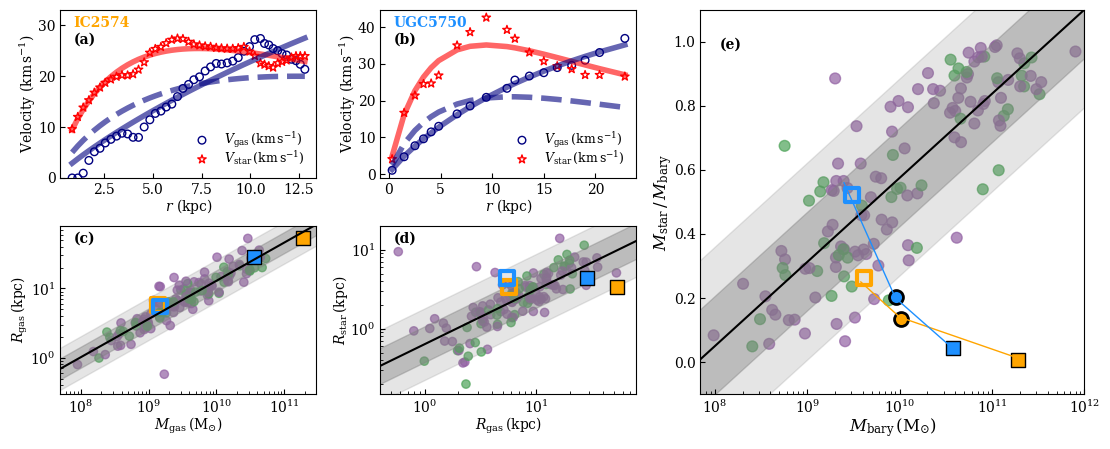

In [79]:
fig = plt.figure()
ax1 = fig.add_axes((1,0,0.6,0.8))
ax2 = fig.add_axes((0.,0.45,0.4,0.35))
ax4 = fig.add_axes((0.,0.00,0.4,0.35))
ax3 = fig.add_axes((0.5,0.45,0.4,0.35))
ax5 = fig.add_axes((0.5,0.00,0.4,0.35))

c1,c2 = 'orange','dodgerblue'

axs = [ax1,ax2,ax3,ax4,ax5]

for ax in axs:
    ax.tick_params(direction = 'in', which = 'both')
    
ax2.scatter(ic_r,ic_vg,marker = 'o',facecolor = 'none',edgecolor = 'navy',s = 30,label = '$V_{\mathrm{gas}}\,(\mathrm{km\,s^{-1}})$')
ax2.scatter(ic_r,ic_vs,marker = '*',facecolor = 'none',edgecolor = 'r',s = 40,label = '$V_{\mathrm{star}}\,(\mathrm{km\,s^{-1}})$')
ax2.set_xlabel('$r$ (kpc)',size = 10,labelpad = 0)
ax2.set_ylabel('Velocity ($\mathrm{km\,s^{-1}}$)',size = 10,labelpad = 0)
ax2.plot(ic_r,pp.v_exp(ic_lmstar,ic_rdstar,ic_r),c = 'r',ls = '-',lw = 4,alpha = 0.6)
ax2.plot(ic_r,pp.v_exp(ic_lmgas,ic_rdgas,ic_r),color = 'navy',ls = '-',lw = 4,alpha = 0.6)
ax2.plot(ic_r,pp.v_exp(ic_lmgas2,ic_rdgas2,ic_r),color = 'navy',ls = '--',lw = 4,alpha = 0.6)
ax2.set_ylim(0,33)
ax2.legend(framealpha = 0,labelspacing = 0,prop = {'size':9})
ax2.text(0.05,0.9,'IC2574',transform = ax2.transAxes,color = c1,weight = 'bold')
ax2.text(0.05,0.8,'(a)',transform = ax2.transAxes,color = 'k',weight = 'bold')

ax3.scatter(ugc_r,ugc_vg,marker = 'o',facecolor = 'none',edgecolor = 'navy',s = 30,label = '$V_{\mathrm{gas}}\,(\mathrm{km\,s^{-1}})$')
ax3.scatter(ugc_r,ugc_vs,marker = '*',facecolor = 'none',edgecolor = 'r',s = 40,label = '$V_{\mathrm{star}}\,(\mathrm{km\,s^{-1}})$')
ax3.set_xlabel('$r$ (kpc)',size = 10,labelpad = 0)
ax3.set_ylabel('Velocity ($\mathrm{km\,s^{-1}}$)',size = 10,labelpad = 0)
ax3.plot(ugc_r,pp.v_exp(ugc_lmstar,ugc_rdstar,ugc_r), c = 'r', lw = 4,alpha = 0.6)
ax3.plot(ugc_r,pp.v_exp(ugc_lmgas,ugc_rdgas,ugc_r),c = 'navy',lw = 4,alpha = 0.6)
ax3.plot(ugc_r,pp.v_exp(ugc_lmgas2,ugc_rdgas2,ugc_r),c = 'navy',ls = '--',lw = 4,alpha = 0.6)
ax3.legend(framealpha = 0,labelspacing = 0,prop = {'size':9})
ax3.text(0.05,0.9,'UGC5750',transform = ax3.transAxes,color = c2,weight = 'bold')
ax3.text(0.05,0.8,'(b)',transform = ax3.transAxes,color = 'k',weight = 'bold')


ax4.scatter(sparc_mgas,sparc_rdgas,color=Clrs,alpha = 0.7)
ax4.plot(10**x1,10**y1, c = 'k')
ax4.fill_between(10**x1, 10**(y1-sig1), 10**(y1+sig1), color = 'grey', alpha = 0.4)
ax4.fill_between(10**x1, 10**(y1-2*sig1), 10**(y1+2*sig1), color = 'grey', alpha = 0.2)
ax4.scatter(10**ic_lmgas, ic_rdgas, marker = 's', color = c1, s = 100,edgecolor = 'k')
ax4.scatter(10**ic_lmgas2, ic_rdgas2, marker = 's', color = c1, s = 100,edgecolor = c1,lw = 3, facecolor = 'none')
ax4.scatter(10**ugc_lmgas, ugc_rdgas, marker = 's', color = c2, s = 100,edgecolor = 'k')
ax4.scatter(10**ugc_lmgas2, ugc_rdgas2, marker = 's', color = c2, s = 100,edgecolor = c2,lw = 3,facecolor = 'none')
# ax4.scatter(10**ic_lmgas3, ic_rdgas2, marker = 'o', color = c1, s = 100, edgecolor = 'k',lw = 2)
# ax4.scatter(10**ugc_lmgas3, ugc_rdgas2, marker = 'o', color = c2, s = 100, edgecolor = 'k',lw = 2)
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.set_xlabel('$M_{\mathrm{gas}}\,(\mathrm{M_{\odot}})$',size = 10,labelpad = 0)
ax4.set_ylabel('$R_{\mathrm{gas}}\,\mathrm{(kpc)}$',size = 10, labelpad = 0)
ax4.set_xlim(5e7,3e11)
ax4.set_ylim(3e-1,8e1)
ax4.text(0.05,0.9,'(c)',transform = ax4.transAxes,color = 'k',weight = 'bold')

ax5.scatter(sparc_rdgas,sparc_rdstar,color = Clrs,alpha = 0.7)
ax5.plot(10**x2,10**y2, c = 'k')
ax5.fill_between(10**x2, 10**(y2-sig2), 10**(y2+sig2), color = 'grey', alpha = 0.4)
ax5.fill_between(10**x2, 10**(y2-2*sig2), 10**(y2+2*sig2), color = 'grey', alpha = 0.2)
ax5.scatter(ic_rdgas, ic_rdstar, marker = 's', color = c1, s = 100,edgecolor = 'k')
ax5.scatter(ic_rdgas2, ic_rdstar, marker = 's', color = c1, s = 100,edgecolor = c1,lw = 3,facecolor = 'none')
ax5.scatter(ugc_rdgas, ugc_rdstar, marker = 's', color = c2, s = 100,edgecolor = 'k')
ax5.scatter(ugc_rdgas2, ugc_rdstar, marker = 's', color = c2, s = 100,edgecolor = c2,lw = 3,facecolor = 'none')
ax5.set_xscale('log')
ax5.set_yscale('log')
ax5.set_xlabel('$R_{\mathrm{gas}}\,\mathrm{(kpc)}$',size = 10, labelpad = 0)
ax5.set_ylabel('$R_{\mathrm{star}}\,\mathrm{(kpc)}$',size = 10, labelpad = 0)
ax5.set_xlim(4e-1,8e1)
ax5.set_ylim(1.5e-1,2e1)
ax5.text(0.05,0.9,'(d)',transform = ax5.transAxes,color = 'k',weight = 'bold')

ax1.scatter(sparc_mbary,sparc_mstarbymbary, c=Clrs, alpha = 0.7,s = 60)
ax1.plot(10**x3,y3, c = 'k')
ax1.fill_between(10**x3, (y3-sig3), (y3+sig3), color = 'grey', alpha = 0.4)
ax1.fill_between(10**x3, (y3-2*sig3), (y3+2*sig3), color = 'grey', alpha = 0.2)
ax1.set_xscale('log')
ax1.set_xlabel('$M_{\mathrm{bary}}\,(\mathrm{M_{\odot}})$',size = 12,labelpad = 0)
ax1.set_ylabel('$M_{\mathrm{star}}\,/\,M_{\mathrm{bary}}$',size = 12,labelpad = 0)
ax1.set_xlim(7e7,1e12)
ax1.set_ylim(-0.1,1.1)
ic_yd = sparcd['lcdm']['IC2574']['core_fit']['yd'][0]
ic_mbary = ic_yd*10**ic_lmstar + 10**ic_lmgas
ugc_yd = sparcd['lcdm']['UGC05750']['core_fit']['yd'][0]
ugc_mbary = ugc_yd*10**ugc_lmstar + 10**ugc_lmgas
ax1.scatter(ic_mbary,ic_yd*10**ic_lmstar/ic_mbary,marker = 's', c = c1,s = 100, edgecolor = 'k',lw = 1)
ax1.scatter(ugc_mbary,ugc_yd*10**ugc_lmstar/ugc_mbary,marker = 's', c = c2,s = 100, edgecolor = 'k',lw = 1)
ic_mbary2 = ic_yd*10**ugc_lmstar + 10**ugc_lmgas2
ugc_mbary2 = ugc_yd*10**ugc_lmstar + 10**ugc_lmgas2
ax1.scatter(ic_mbary2,ic_yd*10**ic_lmstar/ic_mbary2,marker = 's',color = c1,s = 100, lw = 3,edgecolor = c1,facecolor = 'none')
ax1.scatter(ugc_mbary2,ugc_yd*10**ugc_lmstar/ugc_mbary2,marker = 's',color = c2,s = 100, lw = 3,edgecolor = c2,facecolor = 'none')
ic_mbary3 = ic_yd*10**ugc_lmstar3 + 10**ugc_lmgas3
ugc_mbary3 = ugc_yd*10**ugc_lmstar3 + 10**ugc_lmgas3
ax1.scatter(ic_mbary3,ic_yd*10**ic_lmstar3/ic_mbary3,marker = 'o',color = c1,s = 100, lw = 2,edgecolor = 'k')
ax1.scatter(ugc_mbary3,ugc_yd*10**ugc_lmstar3/ugc_mbary3,marker = 'o',color = c2,s = 100, lw = 2,edgecolor = 'k')
ax1.plot([3.8e9,1e10,2e11],[0.25,0.14,0.01],c = c1,lw = 1)
ax1.plot([2.5e9,9e9,3.5e10],[0.56,0.2,0.05],c = c2,lw = 1)
ax1.text(0.05,0.9,'(e)',transform = ax1.transAxes,color = 'k',weight = 'bold')


# plt.savefig('../Output/plots_for_report/IC2574_UGC5750_bary_study.pdf',bbox_inches = 'tight',dpi = 300)

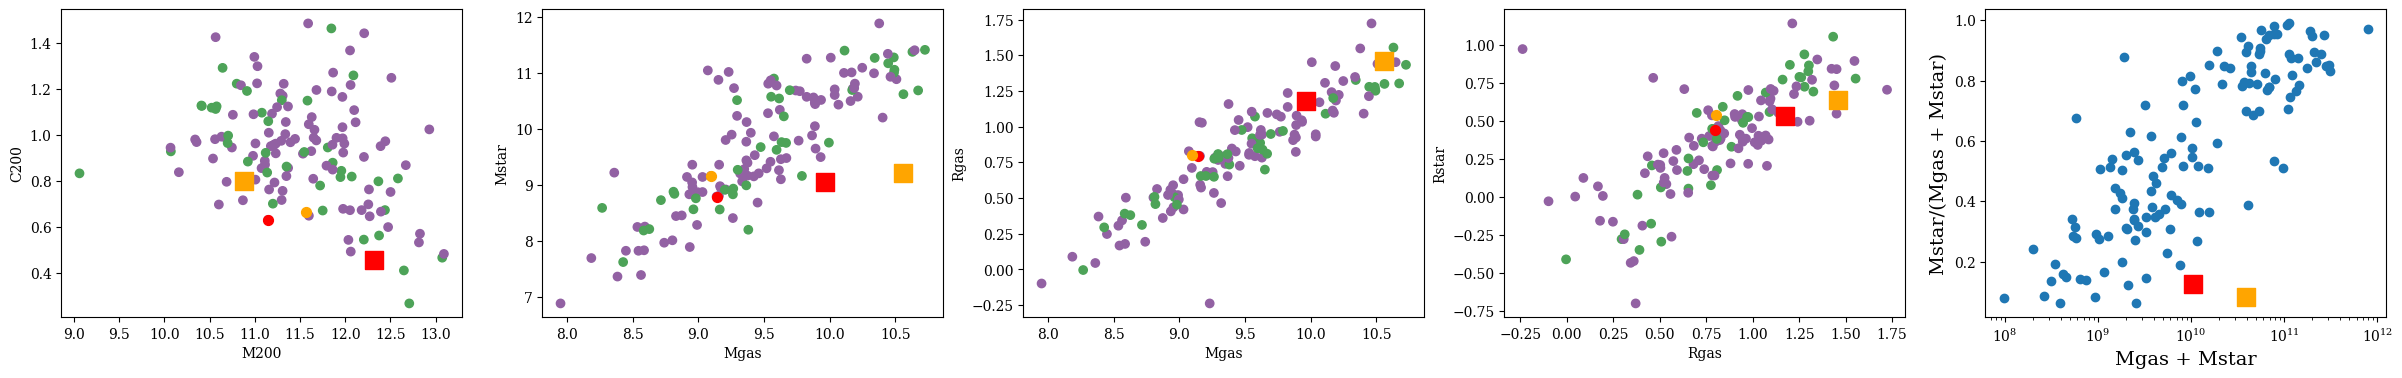

In [387]:
fig,axs = plt.subplots(1,5,figsize = (30,4))
ax0,ax1,ax2,ax3,ax4 = axs

ax0.scatter(Lm,np.log10(np.array(C2)), color = Clr)
ax1.scatter(Lmgas,Lmstar,color = Clr)
ax2.scatter(Lmgas,np.log10(Rgas),color = Clr)
ax3.scatter(np.log10(Rgas),np.log10(Rstar),color = Clr)
ax0.scatter(IC[-2],IC[-1],color = 'r',s = 50)
ax1.scatter(IC[1],IC[0],color = 'r',s = 50)
ax2.scatter(IC[1],IC[2],color = 'r',s = 50)
ax3.scatter(IC[2],IC[3],color = 'r',s = 50)

ax0.scatter(UG[-2],UG[-1],color = 'orange',s = 50)
ax1.scatter(UG[1],UG[0],color = 'orange',s = 50)
ax2.scatter(UG[1],UG[2],color = 'orange',s = 50)
ax3.scatter(UG[2],UG[3],color = 'orange',s = 50)

ax0.scatter(ic_params[0],np.log10(ic_params[1]),c = 'r', marker = 's', s = 150)
ax1.scatter(ic_lmgas,ic_lmstar+np.log10(ic_params[-1]), c = 'r', marker = 's', s = 150)
ax2.scatter(ic_lmgas, np.log10(ic_rdgas), c = 'r', marker = 's', s = 150)
ax3.scatter(np.log10(ic_rdgas), np.log10(ic_rdstar), c = 'r', marker = 's',s = 150)

ax0.scatter(ugc_params[0],np.log10(ugc_params[1]),c = 'orange',marker = 's',s = 150)
ax1.scatter(ugc_lmgas,ugc_lmstar+np.log10(ugc_params[-1]), c = 'orange', marker = 's', s = 150)
ax2.scatter(ugc_lmgas, np.log10(ugc_rdgas), c = 'orange', marker = 's', s = 150)
ax3.scatter(np.log10(ugc_rdgas), np.log10(ugc_rdstar), c = 'orange', marker = 's',s = 150)

ax0.set_xlabel('M200')
ax1.set_xlabel('Mgas')
ax2.set_xlabel('Mgas')
ax3.set_xlabel('Rgas')

ax0.set_ylabel('C200')
ax1.set_ylabel('Mstar')
ax2.set_ylabel('Rgas')
ax3.set_ylabel('Rstar')


ax4.scatter(10**np.array(Lmstar)+10**np.array(Lmgas),10**np.array(Lmstar)/(10**np.array(Lmgas)+10**np.array(Lmstar)))
ax4.scatter(10**ic_lmgas + 10**ic_lmstar, 10**ic_lmstar/(10**ic_lmstar + 10**ic_lmgas),c = 'r',marker = 's', s = 150)
ax4.scatter(10**ugc_lmgas + 10**ugc_lmstar, 10**ugc_lmstar/(10**ugc_lmstar + 10**ugc_lmgas),c = 'orange',marker = 's', s = 150)
ax4.set_xlabel('Mgas + Mstar',size = 14)
ax4.set_ylabel('Mstar/(Mgas + Mstar)',size = 14)
ax4.set_xscale('log')

<ErrorbarContainer object of 3 artists>

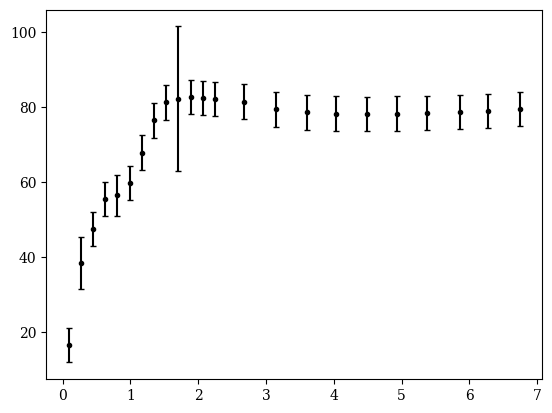

In [396]:
data = np.loadtxt('../../Accessory/RotCurvs/UGC05721_rotmod.dat')
plt.errorbar(data[:,0],data[:,1],data[:,2],fmt = '.', c = 'k',capsize = 2)

In [432]:
for prior in sparcd.keys():
    try:
        print (sparcd[prior]['UGC05750']['core_fit']['lmstar'][0],sparcd[prior]['IC2574']['core_fit']['lmstar'][0])
    except:
        print (prior)

9.121253106108279 8.878355579030206
9.09403062832018 8.91810971995907
lcdm_vmax
9.190606341770213 8.796474814748588
lcdm_vmax_shm
